In [1]:
import numpy as np 
import pandas as pd # data processing

##### loading df
redditData = pd.read_csv("/kaggle/input/reddit-machine-learning-and-data-science/machine_learning_and_data_science_subreddit_data.csv")
redditData.head(10) #looking at the df 

,title,id,redditor,num_upvotes,subreddit,url,num_comments,created_on,body,upvote_ratio,over_18,link_flair_text,edited
0,It’s never too early,fg73za,da_chosen1,2892,datascience,https://i.redd.it/0c9louclfrl41.jpg,58,2020-03-10 16:26:29,NaN,0.98,False,NaN,False
1,Shout Out to All the Mediocre Data Scientists ...,hohvgq,MrBurritoQuest,2638,datascience,https://www.reddit.com/r/datascience/comments/...,262,2020-07-10 17:15:31,I've been lurking on this sub for a while now ...,0.98,False,Discussion,False
2,Imposter Syndrome is a problem for me and I th...,e6iy5o,ExecutiveFingerblast,2498,datascience,https://i.redd.it/e292g50m4u241.jpg,136,2019-12-06 05:16:05,NaN,0.98,False,NaN,False
3,True that,ejvao9,NaN,2313,datascience,https://i.redd.it/vh0ey1fgsm841.jpg,227,2020-01-05 00:23:50,NaN,0.97,False,Fun/Trivia,False
4,Graph of graph analysis,frkgr7,VeryOddEvey,2226,datascience,https://i.redd.it/m99e3svtpqp41.jpg,43,2020-03-30 18:17:40,NaN,0.98,False,Fun/Trivia,False
5,DS at a glance,dudedh,Siba911,2211,datascience,https://i.redd.it/mdlja2h1wvx31.jpg,90,2019-11-11 05:45:38,NaN,0.98,False,Fun/Trivia,False
6,When the boss doesn’t like your charts,eb240z,threddyrex,1963,datascience,https://i.redd.it/cyg4vip06u441.jpg,74,2019-12-16 07:26:56,NaN,0.98,False,NaN,False
7,"For any python & pandas users out there, here'...",f6xk72,aschonfe,1931,datascience,https://v.redd.it/2u0skf49j4i41,193,2020-02-21 08:13:53,NaN,0.99,False,Tooling,False
8,The next time my coworkers ask what metrics I ...,g4jc29,shreddit47,1846,datascience,https://v.redd.it/ijncrmm5hvt41,66,2020-04-20 14:35:25,NaN,0.97,False,Fun/Trivia,False
9,Fit an exponential curve to anything...,fvu3qu,JustGlowing,1835,datascience,https://i.redd.it/y9u0j7ggd5r41.png,91,2020-04-06 20:40:28,NaN,0.98,False,Fun/Trivia,False


In [2]:
'''
displaying titles & urls of top 15 posts 
ordered by # of comments
from datascience subreddit
s.t. upvotes > mean(upvotes) 
'''

#

#calculating mean upvotes 
meanUpvotes = np.mean(redditData["num_upvotes"])
#selecting title/url columns of query
redditQuery1 = (redditData.query('num_upvotes > @meanUpvotes and subreddit == "datascience"')
                .sort_values(by=['num_comments'], ascending=False))[["title", "url"]]
#displaying top 15
redditQuery1.head(15)

,title,url
1,Shout Out to All the Mediocre Data Scientists ...,https://www.reddit.com/r/datascience/comments/...
16513,Shout Out to All the Mediocre Data Scientists ...,https://www.reddit.com/r/datascience/comments/...
16512,The pain and excitement,https://i.redd.it/yqnunwryjg971.jpg
2,Imposter Syndrome is a problem for me and I th...,https://i.redd.it/e292g50m4u241.jpg
16516,Imposter Syndrome is a problem for me and I th...,https://i.redd.it/e292g50m4u241.jpg
16515,how about that data integrity yo,https://i.redd.it/x5hj821ilsa71.jpg
16511,data siens,https://dslntlv9vhjr4.cloudfront.net/posts_ima...
16514,It’s never too early,https://i.redd.it/0c9louclfrl41.jpg
0,It’s never too early,https://i.redd.it/0c9louclfrl41.jpg


In [3]:
'''
aggreggate means
'''

redditData.agg({'num_upvotes': np.mean,'num_comments': np.mean, 'upvote_ratio':np.mean})


num_upvotes     2387.835979
num_comments     130.099246
upvote_ratio       0.924147
dtype: float64

array([[<AxesSubplot:title={'center':'num_upvotes'}>,
        <AxesSubplot:title={'center':'log_num_upvotes'}>],
       [<AxesSubplot:title={'center':'num_comments'}>,
        <AxesSubplot:title={'center':'log_num_comments'}>],
       [<AxesSubplot:title={'center':'upvote_ratio'}>, <AxesSubplot:>]],
      dtype=object)

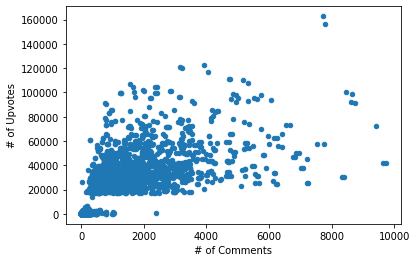

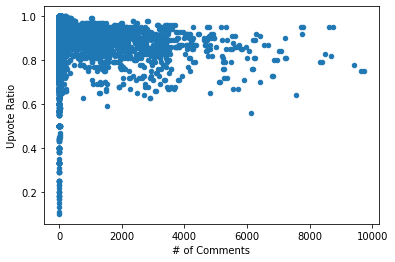

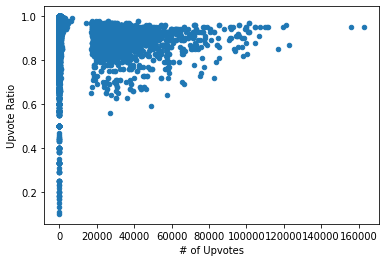

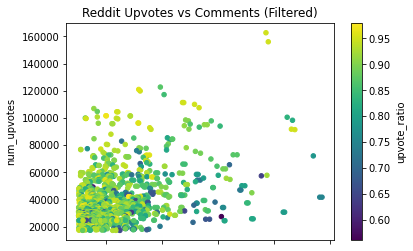

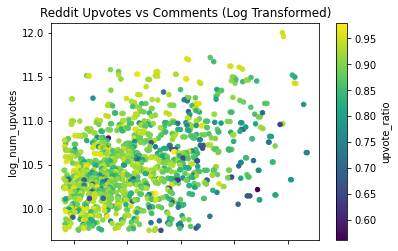

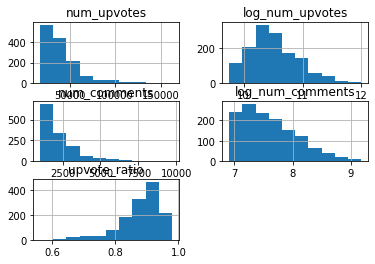

In [4]:
'''
scatterplots and histograms of different continuous variables w pandas
'''

redditData.plot.scatter(x = 'num_comments', y = 'num_upvotes').set(xlabel = "# of Comments", ylabel = "# of Upvotes")
redditData.plot.scatter(x = 'num_comments', y = 'upvote_ratio').set(xlabel = "# of Comments", ylabel = "Upvote Ratio")
redditData.plot.scatter(x = 'num_upvotes', y = 'upvote_ratio').set(xlabel = "# of Upvotes", ylabel = "Upvote Ratio")

#filtering out outlier values
redditFiltered = redditData.query('num_comments >= 1000 and num_upvotes >= 1500')

redditFiltered.plot.scatter(x = 'num_comments', y = 'num_upvotes', c = 'upvote_ratio', colormap='viridis',
                            title = "Reddit Upvotes vs Comments (Filtered)")

#log transformation on upvotes and comments

redditLogUpvote = redditFiltered.assign(log_num_upvotes = lambda x: np.log(x.num_upvotes),
                                        log_num_comments = lambda x: np.log(x.num_comments))
        

redditLogUpvote.plot.scatter(x = 'log_num_comments', y = 'log_num_upvotes', c = 'upvote_ratio', colormap='viridis',
                            title = "Reddit Upvotes vs Comments (Log Transformed)")

#plotting histograms of individual variables
redditLogUpvote.hist(column = ["num_upvotes", "log_num_upvotes", "num_comments","log_num_comments","upvote_ratio"])